Fréquence d'échantillonnage : 44100 Hz
Type de données : int16
Nombre d'échantillons : 12961


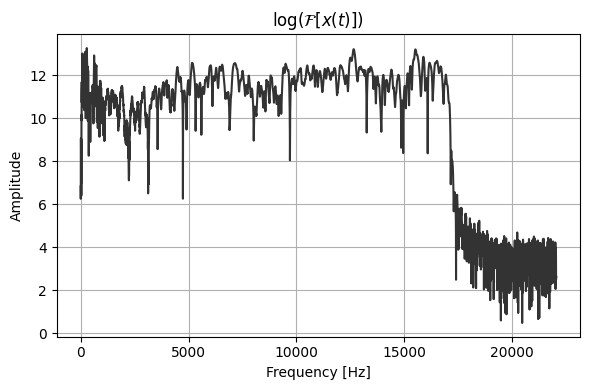

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# --- Chemin du fichier .wav ---
wav_path = "data/formatwav/C2_2.wav"   # ⬅️ remplace par ton fichier

# --- Lecture du fichier ---
fs, data = wavfile.read(wav_path)

print(f"Fréquence d'échantillonnage : {fs} Hz")
print(f"Type de données : {data.dtype}")
print(f"Nombre d'échantillons : {len(data)}")

# Si stéréo → convertir en mono
if data.ndim == 2:
    print("Signal stéréo détecté → conversion en mono (moyenne des 2 canaux).")
    data = data.mean(axis=1)

N = len(data)
fft_result = np.fft.fft(data)
freqs = np.fft.fftfreq(N, d=1/fs)
freqs_pos = freqs[:N // 2]
fft_magnitude = np.abs(fft_result[:N // 2])
log = np.log(fft_magnitude)

'''# --- Axe temporel ---
t = np.arange(N) / fs'''

# --- Affichage ---
plt.figure(figsize=(6, 4))
plt.plot(freqs_pos, log, color=[0.2, 0.2, 0.2])
plt.title(r'$\log(\mathcal{F}[x(t)])$')
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.savefig('signal.png', dpi=150)
plt.show()

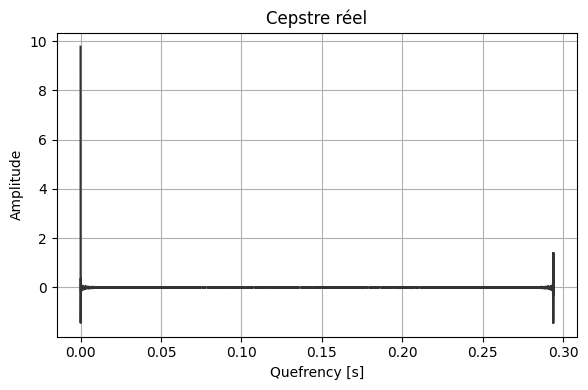

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# --- Chemin du fichier .wav ---
wav_path = "data/formatwav/C2_2.wav"

# --- Lecture du fichier ---
fs, data = wavfile.read(wav_path)

# Convertir en mono
if data.ndim == 2:
    data = data.mean(axis=1)

# --- FFT ---
N = len(data)
fft_result = np.fft.fft(data)

# --- Cepstre réel ---
log_mag = np.log(np.abs(fft_result) + 1e-12)  # éviter log(0)
cepstre = np.fft.ifft(log_mag).real

# --- Axe des quefrencies (temps du cepstre)
quef = np.arange(N) / fs

# --- Affichage ---
plt.figure(figsize=(6, 4))
plt.plot(quef, cepstre, color=[0.2, 0.2, 0.2])
#plt.xlim(0.292, 0.295)  # zoom utile : formants / pitch → 0–20 ms
plt.title("Cepstre réel")
plt.xlabel("Quefrency [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

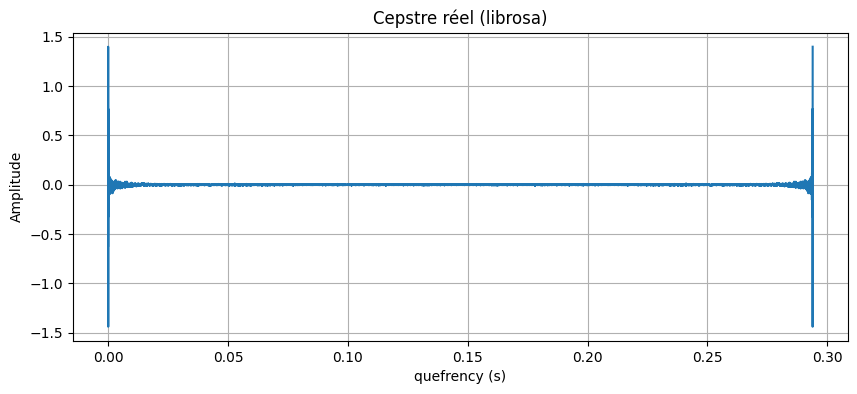

In [44]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# --- Charger le signal ---
wav_path = "data/formatwav/C2_2.wav"
y, fs = librosa.load(wav_path, sr=None, mono=True)

# --- FFT ---
N = len(y)
spec = np.fft.fft(y)

# --- Cepstre réel ---
log_mag = np.log(np.abs(spec) + 1e-12)
cepstre = np.fft.ifft(log_mag).real

# --- Axe du cepstre (quefrency) ---
quef = np.arange(N) / fs

# --- Affichage ---
plt.figure(figsize=(10, 4))
plt.plot(quef, cepstre)
plt.title("Cepstre réel (librosa)")
plt.xlabel("quefrency (s)")
plt.ylabel("Amplitude")
plt.grid(True)
#plt.xlim(0, 0.02)  # zoom utile (0–20 ms)
plt.show()

MFCC min AVANT : -656.29504
MFCC min APRES : 1e-06


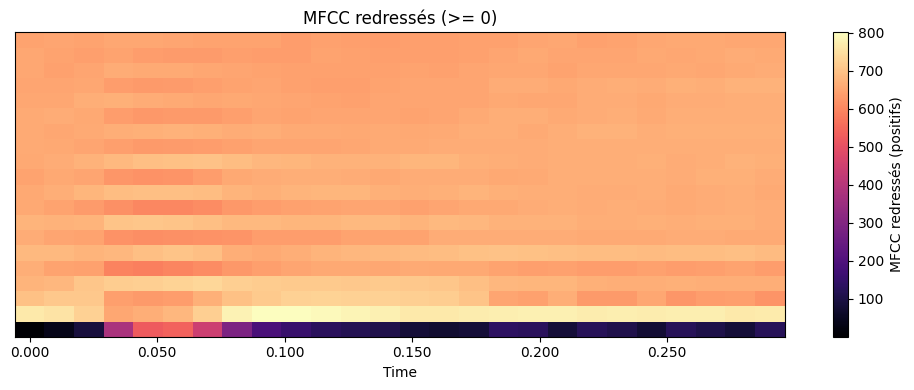

In [45]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# --- Charger le signal ---
wav_path = "data/formatwav/C2_2.wav"
y, fs = librosa.load(wav_path, sr=None, mono=True)

# --- Calcul MFCC ---
mfcc = librosa.feature.mfcc(
    y=y,
    sr=fs,
    n_mfcc=20,        # nombre de coefficients cepstraux
    n_fft=2048,
    hop_length=512
)

# --- Redresser pour avoir uniquement des valeurs positives ---
eps = 1e-6
mfcc_pos = mfcc - np.min(mfcc) + eps

print("MFCC min AVANT :", np.min(mfcc))
print("MFCC min APRES :", np.min(mfcc_pos))

# --- Affichage ---
plt.figure(figsize=(10, 4))
librosa.display.specshow(
    mfcc_pos,
    sr=fs,
    x_axis='time'
)
plt.colorbar(label='MFCC redressés (positifs)')
plt.title("MFCC redressés (>= 0)")
plt.tight_layout()
plt.show()

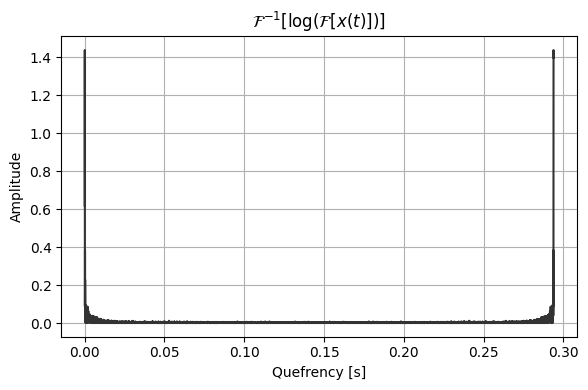

In [52]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# --- Charger le signal ---
wav_path = "data/formatwav/C2_2.wav"
y, fs = librosa.load(wav_path, sr=None, mono=True)

# --- FFT ---
N = len(y)
spec = np.fft.fft(y)

# --- Cepstre réel ---
log_mag = np.log(np.abs(spec) + 1e-12)        # log(|F|)
cepstre = np.fft.ifft(log_mag).real           # IFFT -> cepstre réel

# --- Redressement : tout rendre positif ---
cepstre_rect = np.abs(cepstre)

# --- Axe du cepstre ---
quef = np.arange(N) / fs

# --- Visualisation ---
plt.figure(figsize=(6, 4))
plt.plot(quef, cepstre_rect, color=[0.2, 0.2, 0.2])
plt.title(r'$\mathcal{F}^{-1}[\log(\mathcal{F}[x(t)])]$')
plt.xlabel("Quefrency [s]")
plt.ylabel("Amplitude")
plt.grid(True)
#plt.xlim(0, 0.02)  # zone utile 0–20 ms (pitch, formants)
plt.savefig('signal.png', dpi=150)
plt.tight_layout()
plt.show()